# Favourite Animal Detection

For this assignment, I have choosen the kaggle dataset, Penguins vs Turtles.
The link to the dataset is: https://www.kaggle.com/datasets/abbymorgan/penguins-vs-turtles

Description: The dataset has images for Turtles and Penguins. For the task, I have choosen Penguin to be my fav animal

For the baseline, I have trained the model on detecting only penguin, But for the YOLOv8, I have trained it on both animals and compared the metrics of detecting Penguins with the baseline model.

Reference notebooks: 
https://www.kaggle.com/code/jwizzed/98-penguins-vs-turtles
https://www.kaggle.com/code/daking97/penguins-vs-turtles-classifier


In [20]:
import os
import pandas as pd
from PIL import Image
import numpy as np

## Preprocessing

In [5]:
## Defining the intial folder paths

folder_path_train = '../data/train/'
folder_path_valid = '../data/valid/'

In [6]:
## Dataframe for train annotations
with open('../data/train_annotations', 'r') as file:
    df = pd.read_json(file)

In [82]:
## Dataframe for train annotations

with open('../data/valid_annotations', 'r') as file:
    df_valid = pd.read_json(file)

In [7]:
df

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,1,"[119, 25, 205, 606]",124230,[],0
1,1,1,1,"[131, 82, 327, 440]",143880,[],0
2,2,2,2,"[225, 298, 198, 185]",36630,[],0
3,3,3,2,"[468, 109, 172, 193]",33196,[],0
4,4,4,1,"[14, 242, 611, 154]",94094,[],0
...,...,...,...,...,...,...,...
495,495,495,2,"[92, 203, 456, 230]",104880,[],0
496,496,496,1,"[229, 359, 144, 131]",18864,[],0
497,497,497,1,"[258, 183, 126, 323]",40698,[],0
498,498,498,1,"[140, 55, 336, 517]",173712,[],0


In [86]:
df_valid.head()

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,1,"[227, 93, 298, 525]",156450,[],0
1,1,1,2,"[211, 198, 428, 259]",110852,[],0
2,2,2,2,"[0, 243, 512, 267]",136704,[],0
3,3,3,1,"[128, 178, 457, 354]",161778,[],0
4,4,4,1,"[168, 131, 296, 469]",138824,[],0


In [8]:
## Extracting values from bbox

df[['xmin', 'ymin', 'xmax', 'ymax']] = df['bbox'].apply(lambda x: pd.Series(x))

In [88]:
df_valid[['xmin', 'ymin', 'xmax', 'ymax']] = df_valid['bbox'].apply(lambda x: pd.Series(x))

In [9]:
df

,id,image_id,category_id,bbox,area,segmentation,iscrowd,xmin,ymin,xmax,ymax
0,0,0,1,"[119, 25, 205, 606]",124230,[],0,119,25,205,606
1,1,1,1,"[131, 82, 327, 440]",143880,[],0,131,82,327,440
2,2,2,2,"[225, 298, 198, 185]",36630,[],0,225,298,198,185
3,3,3,2,"[468, 109, 172, 193]",33196,[],0,468,109,172,193
4,4,4,1,"[14, 242, 611, 154]",94094,[],0,14,242,611,154
...,...,...,...,...,...,...,...,...,...,...,...
495,495,495,2,"[92, 203, 456, 230]",104880,[],0,92,203,456,230
496,496,496,1,"[229, 359, 144, 131]",18864,[],0,229,359,144,131
497,497,497,1,"[258, 183, 126, 323]",40698,[],0,258,183,126,323
498,498,498,1,"[140, 55, 336, 517]",173712,[],0,140,55,336,517


In [10]:
train_files = os.listdir('../data/train')

In [91]:
val_files = os.listdir('../data/valid')

In [11]:
train_files

['image_id_000.jpg',
 'image_id_001.jpg',
 'image_id_002.jpg',
 'image_id_003.jpg',
 'image_id_004.jpg',
 'image_id_005.jpg',
 'image_id_006.jpg',
 'image_id_007.jpg',
 'image_id_008.jpg',
 'image_id_009.jpg',
 'image_id_010.jpg',
 'image_id_011.jpg',
 'image_id_012.jpg',
 'image_id_013.jpg',
 'image_id_014.jpg',
 'image_id_015.jpg',
 'image_id_016.jpg',
 'image_id_017.jpg',
 'image_id_018.jpg',
 'image_id_019.jpg',
 'image_id_020.jpg',
 'image_id_021.jpg',
 'image_id_022.jpg',
 'image_id_023.jpg',
 'image_id_024.jpg',
 'image_id_025.jpg',
 'image_id_026.jpg',
 'image_id_027.jpg',
 'image_id_028.jpg',
 'image_id_029.jpg',
 'image_id_030.jpg',
 'image_id_031.jpg',
 'image_id_032.jpg',
 'image_id_033.jpg',
 'image_id_034.jpg',
 'image_id_035.jpg',
 'image_id_036.jpg',
 'image_id_037.jpg',
 'image_id_038.jpg',
 'image_id_039.jpg',
 'image_id_040.jpg',
 'image_id_041.jpg',
 'image_id_042.jpg',
 'image_id_043.jpg',
 'image_id_044.jpg',
 'image_id_045.jpg',
 'image_id_046.jpg',
 'image_id_04

In [13]:
## Adding the filepaths for train in df

df['filepaths'] = [folder_path_train + file for file in train_files]

In [92]:
## Adding the filepaths for valid dir in df

df_valid['filepaths'] = [folder_path_train + file for file in val_files]

In [14]:
df

,id,image_id,category_id,bbox,area,segmentation,iscrowd,xmin,ymin,xmax,ymax,filepaths
0,0,0,1,"[119, 25, 205, 606]",124230,[],0,119,25,205,606,../data/train/image_id_000.jpg
1,1,1,1,"[131, 82, 327, 440]",143880,[],0,131,82,327,440,../data/train/image_id_001.jpg
2,2,2,2,"[225, 298, 198, 185]",36630,[],0,225,298,198,185,../data/train/image_id_002.jpg
3,3,3,2,"[468, 109, 172, 193]",33196,[],0,468,109,172,193,../data/train/image_id_003.jpg
4,4,4,1,"[14, 242, 611, 154]",94094,[],0,14,242,611,154,../data/train/image_id_004.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,495,2,"[92, 203, 456, 230]",104880,[],0,92,203,456,230,../data/train/image_id_495.jpg
496,496,496,1,"[229, 359, 144, 131]",18864,[],0,229,359,144,131,../data/train/image_id_496.jpg
497,497,497,1,"[258, 183, 126, 323]",40698,[],0,258,183,126,323,../data/train/image_id_497.jpg
498,498,498,1,"[140, 55, 336, 517]",173712,[],0,140,55,336,517,../data/train/image_id_498.jpg


In [15]:
## Making the labels 0 and 1, since the animal choosen is penguin with label 1

df['category_id'] = df['category_id'].apply(lambda x: 0 if x == 2 else 1)

In [89]:
df_valid['category_id'] = df_valid['category_id'].apply(lambda x: 0 if x == 2 else 1)

In [16]:
df

,id,image_id,category_id,bbox,area,segmentation,iscrowd,xmin,ymin,xmax,ymax,filepaths
0,0,0,1,"[119, 25, 205, 606]",124230,[],0,119,25,205,606,../data/train/image_id_000.jpg
1,1,1,1,"[131, 82, 327, 440]",143880,[],0,131,82,327,440,../data/train/image_id_001.jpg
2,2,2,0,"[225, 298, 198, 185]",36630,[],0,225,298,198,185,../data/train/image_id_002.jpg
3,3,3,0,"[468, 109, 172, 193]",33196,[],0,468,109,172,193,../data/train/image_id_003.jpg
4,4,4,1,"[14, 242, 611, 154]",94094,[],0,14,242,611,154,../data/train/image_id_004.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,495,0,"[92, 203, 456, 230]",104880,[],0,92,203,456,230,../data/train/image_id_495.jpg
496,496,496,1,"[229, 359, 144, 131]",18864,[],0,229,359,144,131,../data/train/image_id_496.jpg
497,497,497,1,"[258, 183, 126, 323]",40698,[],0,258,183,126,323,../data/train/image_id_497.jpg
498,498,498,1,"[140, 55, 336, 517]",173712,[],0,140,55,336,517,../data/train/image_id_498.jpg


In [47]:
## Preparing data for the model

images = []
labels = []
bboxes = []
for index, row in df.iterrows():
   
    img = Image.open(row['filepaths'])
    w, h = img.size
    x_scale = 224.0 / w
    y_scale = 224.0 / h
    img = img.resize((224, 224))
    images.append(img)

    ## Rescaling the bbox values accordingly
    
    x_min = int(row["xmin"] * x_scale) / 224.0
    y_min = int(row["ymin"] * y_scale) / 224.0
    x_max = int(row["xmax"] * x_scale) / 224.0
    y_max = int(row["ymax"] * y_scale) / 224.0
    bboxes.append((x_min, y_min, x_max, y_max))
    labels.append(row["category_id"])

In [48]:
## Converting to np arrays for training

images = np.array(images, dtype="float32") / 255.0
labels = np.array(labels)
bboxes = np.array(bboxes, dtype="float32")

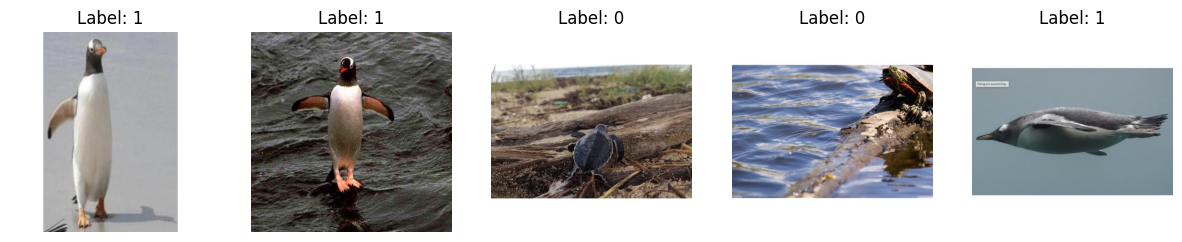

In [17]:
import matplotlib.pyplot as plt
## Displaying Images
def display_images_from_paths(dataframe, num_images=5):
    plt.figure(figsize=(15, 7))

    for i in range(num_images):
        file_path = dataframe.iloc[i]['filepaths']
        label = dataframe.iloc[i]['category_id']
        image = load_img(file_path)  # Load the image from the file path
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(f'Label: {label}')
        plt.axis('off')

    plt.show()

# Display a few images with their labels
display_images_from_paths(df)

## Baseline Model (Simple CNN)

In [21]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [49]:
from keras.models import Model

# Split the dataset
train_images, test_images, train_bbox, test_bbox, train_labels, test_labels = train_test_split(images, bboxes, labels, test_size=0.2, random_state=42)

## Building a simple CNN as Baseline

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten()
])
label_layer = Dense(128, activation='relu')(model.output)
label_layer = Dense(1, activation='sigmoid', name='label')(label_layer)
bbox_layers = Dense(128, activation='relu')(model.output)
bbox_layers = Dense(4, activation='sigmoid', name='bbox')(bbox_layers)
model_obj = Model(inputs=model.input, 
                  outputs=(bbox_layers, label_layer))


In [50]:
model_obj.compile(optimizer='adam', loss=['mean_squared_error','binary_crossentropy'], metrics=['accuracy'])

In [51]:
model_obj.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 conv2d_14_input (InputLaye  [(None, 224, 224, 3)]        0         []                            
 r)                                                                                               
                                                                                                  
 conv2d_14 (Conv2D)          (None, 222, 222, 32)         896       ['conv2d_14_input[0][0]']     
                                                                                                  
 max_pooling2d_14 (MaxPooli  (None, 111, 111, 32)         0         ['conv2d_14[0][0]']           
 ng2D)                                                                                            
                                                                                           

In [52]:
print(train_labels)

[0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0
 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1
 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0
 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0
 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1
 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0]


In [53]:
train_target = {'label': train_labels,'bbox': train_bbox}
val_target = {'label': test_labels,'bbox': test_bbox}

In [54]:
## Fitting the Model

model_obj.fit(train_images, train_target, epochs=10, validation_data=(test_images, val_target))

Epoch 1/10
13/13 [==============================] - 15s 834ms/step - loss: 1.9445 - bbox_loss: 0.1382 - label_loss: 1.8062 - bbox_accuracy: 0.3625 - label_accuracy: 0.5350 - val_loss: 0.7160 - val_bbox_loss: 0.0515 - val_label_loss: 0.6645 - val_bbox_accuracy: 0.3100 - val_label_accuracy: 0.4700
Epoch 2/10
13/13 [==============================] - 11s 800ms/step - loss: 0.5705 - bbox_loss: 0.0392 - label_loss: 0.5313 - bbox_accuracy: 0.5000 - label_accuracy: 0.7500 - val_loss: 0.6328 - val_bbox_loss: 0.0438 - val_label_loss: 0.5891 - val_bbox_accuracy: 0.4800 - val_label_accuracy: 0.7900
Epoch 3/10
13/13 [==============================] - 10s 757ms/step - loss: 0.4383 - bbox_loss: 0.0288 - label_loss: 0.4095 - bbox_accuracy: 0.6400 - label_accuracy: 0.8225 - val_loss: 0.6744 - val_bbox_loss: 0.0408 - val_label_loss: 0.6335 - val_bbox_accuracy: 0.5400 - val_label_accuracy: 0.7300
Epoch 4/10
13/13 [==============================] - 11s 827ms/step - loss: 0.3103 - bbox_loss: 0.0233 - label

- Comment: Here we can see that the bbox accuracy is very low as there were not emnough layers in the bbox layers to train well.

### Baseline testing

(224, 224, 3)


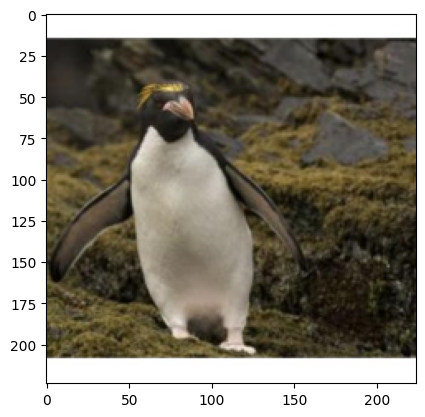

In [68]:
import cv2

## Loading Image
img_org = cv2.imread("../data/valid/image_id_005.jpg")
img_org = cv2.resize(img_org, (224, 224))
print(img_org.shape)
plt.imshow(cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB))
plt.show()

In [69]:
## Preparing image to be tested

img = img_org.reshape(1, 224, 224, 3)
img = np.array(img, dtype="float32") / 255.0

In [70]:
prediction = model_obj.predict(img)
bbox = prediction[0][0] * 224.0
label = np.argmax(prediction[1], axis=1)

1/1 [==============================] - 0s 95ms/step


In [71]:
xmin, ymin, xmax, ymax = np.array(bbox, dtype=int)

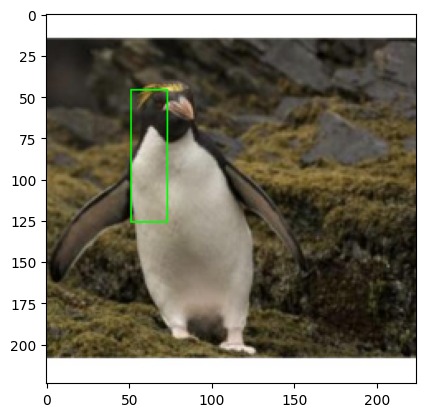

In [72]:
## Showing the detection result

image = cv2.rectangle(img_org, (xmin, ymin), (xmax, ymax), (0, 255, 0))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

Result: The bbox is not well placed because of low accuracy.

## YOLO for Detection

In [73]:
## Defining directories, to be made for the yaml file

train_dir_path = '../train_dir/images'
val_dir_path = '../val_dir/images'

In [43]:
os.makedirs(train_dir_path, exist_ok=True)
os.makedirs(val_dir_path, exist_ok=True)

In [45]:
import shutil
import os

# Iterate over all files in the initial training directory
for filename in os.listdir(folder_path_train):
    if filename.endswith('.jpg'): 
        # Construct the full file path
        file_path = os.path.join(folder_path_train, filename)
        # Copy the file to the new training directory
        shutil.copy(file_path, train_dir_path)


In [47]:
## Does the same for the validation files

for filename in os.listdir(folder_path_valid):
    if filename.endswith('.jpg'):  
        
        file_path = os.path.join(folder_path_valid, filename)
        # Copy the file to the new training directory
        shutil.copy(file_path, val_dir_path)

In [75]:
import os
from PIL import Image

'''Since the bbox values are of the format [xmin, xmax, ymin, ymax], it is required to be changed for the YOLO model. In this function we convert them into x_center, y_center, width, and height'''

def convert_bbox_to_yolo(df, img_width, img_height):

    x_min, y_min, width, height = row['bbox']
    x_center = (x_min + width / 2) / img_width
    y_center = (y_min + height / 2) / img_height
    width /= img_width
    height /= img_height
    return [df['category_id'], x_center, y_center, width, height]

In [77]:
# Did this since the file names were of a different format

df['image_id'] = df['image_id'].apply(lambda x: f"{int(x):03d}")

In [90]:
df_valid['image_id'] = df_valid['image_id'].apply(lambda x: f"{int(x):03d}")

In [81]:
## Loop for making a corresponding text file for each image.
## Format is [label, x_center, y_center, width, height]

for _, row in df.iterrows():
    # Read the dimensions of each image
    image_path = row['filepaths']
    with Image.open(image_path) as img:
        img_width, img_height = img.size

    # Convert the bounding box to YOLO format
    yolo_bbox = convert_bbox_to_yolo(row, img_width, img_height)
    yolo_line = ' '.join(map(str, yolo_bbox))

    # Write to the corresponding YOLO annotation file
    yolo_file_path = os.path.join('../train_dir/labels/', f"image_id_{row['image_id']}.txt")
    print(yolo_line)
    with open(yolo_file_path, 'a') as file:
        file.write(yolo_line + '\n')

1 0.34609375 0.5125 0.3203125 0.946875
1 0.46015625 0.471875 0.5109375 0.6875
0 0.50625 0.61015625 0.309375 0.2890625
0 0.865625 0.32109375 0.26875 0.3015625
1 0.49921875 0.4984375 0.9546875 0.240625
1 0.37109375 0.53203125 0.6859375 0.7203125
1 0.74765625 0.4875 0.5015625 0.78125
0 0.6015625 0.684375 0.721875 0.571875
1 0.7046875 0.73203125 0.384375 0.5359375
0 0.52421875 0.54296875 0.5390625 0.4140625
0 0.4140625 0.490625 0.196875 0.20625
0 0.52265625 0.52734375 0.8203125 0.3203125
1 0.67890625 0.43515625 0.2390625 0.2140625
1 0.51875 0.64765625 0.434375 0.7046875
1 0.50234375 0.55078125 0.0515625 0.1484375
1 0.26484375 0.49375 0.4640625 0.7625
0 0.58515625 0.6875 0.1234375 0.09375
0 0.48515625 0.46328125 0.5296875 0.3453125
0 0.5984375 0.67421875 0.115625 0.1296875
0 0.51953125 0.58203125 0.7609375 0.3234375
0 0.3546875 0.446875 0.35 0.353125
1 0.6875 0.521875 0.3 0.95
1 0.51796875 0.53125 0.0515625 0.140625
0 0.42578125 0.4 0.3921875 0.396875
1 0.5375 0.5453125 0.684375 0.7375
1 0.

In [93]:
## Same for Validation files

for _, row in df_valid.iterrows():
    # Read the dimensions of each image
    image_path = row['filepaths']
    with Image.open(image_path) as img:
        img_width, img_height = img.size

    # Convert the bounding box to YOLO format
    yolo_bbox = convert_bbox_to_yolo(row, img_width, img_height)
    yolo_line = ' '.join(map(str, yolo_bbox))

    # Write to the corresponding YOLO annotation file
    yolo_file_path = os.path.join('../val_dir/labels/', f"image_id_{row['image_id']}.txt")
    print(yolo_line)
    with open(yolo_file_path, 'a') as file:
        file.write(yolo_line + '\n')

1 0.5875 0.55546875 0.465625 0.8203125
0 0.6640625 0.51171875 0.66875 0.4046875
0 0.4 0.58828125 0.8 0.4171875
1 0.55703125 0.5546875 0.7140625 0.553125
1 0.49375 0.57109375 0.4625 0.7328125
1 0.35703125 0.55703125 0.6953125 0.7359375
0 0.440625 0.503125 0.684375 0.503125
1 0.4921875 0.609375 0.396875 0.43125
1 0.73359375 0.61640625 0.2953125 0.4921875
1 0.67890625 0.540625 0.2203125 0.384375
0 0.62109375 0.5515625 0.7578125 0.5625
0 0.48203125 0.5140625 0.5484375 0.18125
0 0.61015625 0.359375 0.7796875 0.596875
0 0.50390625 0.76484375 0.6140625 0.2359375
1 0.5015625 0.56328125 0.446875 0.7546875
1 0.76640625 0.46328125 0.3984375 0.3421875
0 0.5484375 0.46875 0.775 0.415625
1 0.4734375 0.63046875 0.759375 0.7390625
0 0.378125 0.50078125 0.24375 0.1140625
0 0.57734375 0.49453125 0.7984375 0.3484375
1 0.5234375 0.48984375 0.61875 0.6328125
1 0.46953125 0.67890625 0.4421875 0.3546875
0 0.3234375 0.51875 0.646875 0.325
1 0.5234375 0.61015625 0.559375 0.4453125
1 0.26875 0.51875 0.403125 0.

In [96]:
## Writing the final data.yaml file

with open("../data.yaml", "w") as f:
    f.write("train: ../train_dir/images\n")
    f.write("val: ../val_dir/images\n")
    f.write("nc: 2\n")
    f.write("names: {0: 'turtle', 1: 'penguin'}")

In [1]:
from ultralytics import YOLO

In [1]:
## Getting yolov8

model_yolo = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 17.8MB/s]


In [4]:
## Training model

results = model_yolo.train(
    data="../data.yaml", epochs=10, imgsz=320
)  # train the model
results = model_yolo.val()  # evaluate model performance on the validation set

New https://pypi.org/project/ultralytics/8.1.1 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.236 🚀 Python-3.9.18 torch-2.1.2+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=../data.yaml, epochs=10, time=None, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

100%|██████████| 755k/755k [00:00<00:00, 12.4MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning C:\Users\marja\OneDrive\Documents\EPITA\1stSemester\Computer_Vision\fav-animal-detection\train_dir\labels... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:01<00:00, 384.01it/s]


train: New cache created: C:\Users\marja\OneDrive\Documents\EPITA\1stSemester\Computer_Vision\fav-animal-detection\train_dir\labels.cache


val: Scanning C:\Users\marja\OneDrive\Documents\EPITA\1stSemester\Computer_Vision\fav-animal-detection\val_dir\labels... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<00:00, 658.30it/s]

val: New cache created: C:\Users\marja\OneDrive\Documents\EPITA\1stSemester\Computer_Vision\fav-animal-detection\val_dir\labels.cache


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.7603      2.032      1.027          4        320: 100%|██████████| 32/32 [00:41<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]

                   all         72         72      0.539       0.63      0.663      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.8801       1.41      1.061          4        320: 100%|██████████| 32/32 [00:34<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all         72         72      0.776      0.654       0.78      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      0.958      1.385      1.142          4        320: 100%|██████████| 32/32 [00:34<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]

                   all         72         72      0.609        0.5      0.628       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.044      1.349       1.17          4        320: 100%|██████████| 32/32 [00:33<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all         72         72      0.245      0.472      0.323      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.9162      1.237      1.091          4        320: 100%|██████████| 32/32 [00:34<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]

                   all         72         72      0.457      0.332      0.327      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.9113      1.179       1.07          4        320: 100%|██████████| 32/32 [00:33<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]

                   all         72         72      0.697       0.75       0.74      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.8374      1.061      1.035          4        320: 100%|██████████| 32/32 [00:33<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]

                   all         72         72      0.905      0.855      0.922      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.7909     0.9648      1.001          4        320: 100%|██████████| 32/32 [00:35<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]

                   all         72         72      0.828      0.883      0.907      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.7487     0.8853     0.9862          4        320: 100%|██████████| 32/32 [00:35<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]

                   all         72         72      0.917      0.898      0.963      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.6859     0.8168     0.9552          4        320: 100%|██████████| 32/32 [00:34<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all         72         72      0.981       0.93      0.965       0.78



10 epochs completed in 0.107 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.0.236 🚀 Python-3.9.18 torch-2.1.2+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.79s/it]


                   all         72         72      0.917      0.898      0.963      0.803
                turtle         72         36      0.894      0.917      0.971      0.784
               penguin         72         36      0.941      0.879      0.955      0.822
Speed: 0.7ms preprocess, 51.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\train
Ultralytics YOLOv8.0.236 🚀 Python-3.9.18 torch-2.1.2+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\marja\OneDrive\Documents\EPITA\1stSemester\Computer_Vision\fav-animal-detection\val_dir\labels.cache... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


                   all         72         72      0.917      0.898      0.963      0.803
                turtle         72         36      0.894      0.917      0.971      0.784
               penguin         72         36      0.941      0.879      0.955      0.822
Speed: 0.4ms preprocess, 52.6ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs\detect\train2


#### Comments: Fromt he metric used by Yolov8, we can observe that for the 2 animals, the accuracy is much better than the CNN model

- For penguin: Box: 94% and mAP50: 95.5%

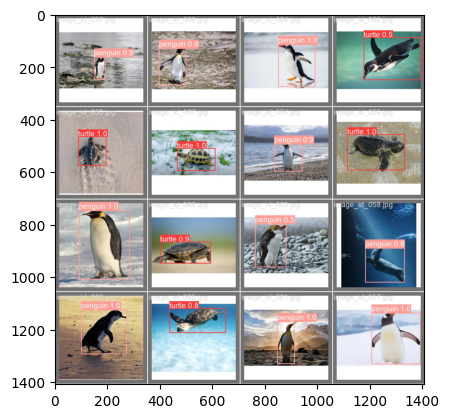

In [22]:
image = Image.open('./runs/detect/train2/val_batch1_pred.jpg')
plt.imshow(image)

## YOLOV8 Testing

In [2]:
model_test = YOLO("./runs/detect/train/weights/best.pt")

In [3]:
import cv2

In [17]:
image = cv2.imread("../image_test_penguin.jpg")
results = model_test([image], imgsz=320)
results = results[0]

0: 224x320 1 penguin, 113.1ms
Speed: 15.6ms preprocess, 113.1ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 320)


In [14]:
from PIL import Image
import matplotlib.pyplot as plt

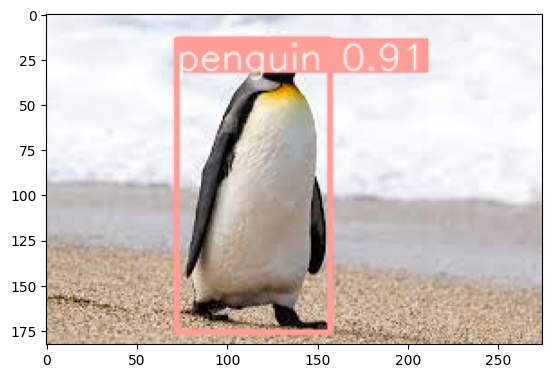

In [18]:
for r in results:
    im_array = r.plot()
    im = Image.fromarray(im_array[..., ::-1])
    plt.imshow(im)